In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [326]:
df = pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [327]:
df.shape

(892, 6)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [329]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [330]:
df.duplicated().sum()

94

In [331]:
df.drop_duplicates(inplace=True)

In [332]:
df.shape

(798, 6)

In [333]:
# extracting model name from name column 
df['model']=df['name'].str.split(' ').str[1:3].apply(lambda x: ' '.join([str(elem) for elem in x]))

In [334]:
# extracting series name from name column after splitting cell
df['series']=df['name'].str.split().str[3:].apply(lambda x: ' '.join([str(elem) for elem in x]))

In [335]:
# replacing company name with name's first word to avoid miss spelled
df['company']=df['name'].str.split().str[0]

In [336]:
# unique values of company to check wrong or other words
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yama',
       'selling', 'URJE', 'Swift', 'Used', 'Jaguar', 'Hyun', 'Jeep',
       'tata', 'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7',
       '9', 'scratch', 'urgent', 'sell', 'Hyunda', 'TATA', 'Any', 'Ta'],
      dtype=object)

In [337]:
# these words in company column which is not a company
not_compny = ['I','Mini','Commercial','selling','URJE','Used','Sale', 'very','i', '2012', 'Well', 'all', '7',
       '9', 'scratch', 'urgent', 'sell','Any', 'Ta']

In [338]:
# checking and keeping only numeric data of year
df=df[df['year'].str.isdigit()]

In [339]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [340]:
# removing comma from price
df['Price']=df['Price'].str.replace(',','')

In [341]:
df['Price'].replace(to_replace='Ask For Price',value=np.nan,inplace=True)
df.dropna(inplace=True)

In [342]:
# arranging columns
df=df[['company', 'model','series', 'year','fuel_type', 'kms_driven', 'Price', ]]

In [343]:
# resete indexing
df.reset_index(inplace=True)

In [344]:
df['year'].unique()
# now year has only numeric values

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [345]:
# as there was some wrong word in company which now removed after fixing year and price columns no need to work in this column
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [346]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [347]:
df['fuel_type'].value_counts()

Petrol    390
Diesel    332
LPG         2
Name: fuel_type, dtype: int64

In [348]:
df.isnull().sum()

index         0
company       0
model         0
series        0
year          0
fuel_type     0
kms_driven    0
Price         0
dtype: int64

In [349]:
# filling nan values as most frequent
df['fuel_type'].fillna('Petrol',inplace=True)

In [350]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [351]:
# replacing str to nan
df['kms_driven']=df['kms_driven'].replace(to_replace='Petrol',value=np.nan)

In [352]:
# removing comma from number
df['kms_driven']=df['kms_driven'].str.replace(',','').str.split().str[0]

In [353]:
# finnling nan value with mean
driven_mean = int(df['kms_driven'].astype(float).mean())
df['kms_driven'].fillna(driven_mean,inplace=True)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       724 non-null    int64 
 1   company     724 non-null    object
 2   model       724 non-null    object
 3   series      724 non-null    object
 4   year        724 non-null    object
 5   fuel_type   724 non-null    object
 6   kms_driven  724 non-null    object
 7   Price       724 non-null    object
dtypes: int64(1), object(7)
memory usage: 45.4+ KB


In [355]:
df[['year','kms_driven','Price']]=df[['year','kms_driven','Price']].astype(int)

- Feature engineering done--

In [356]:
df['company'].value_counts()

Maruti        202
Hyundai       129
Mahindra       78
Tata           61
Honda          51
Toyota         34
Chevrolet      33
Ford           26
Renault        26
Volkswagen     17
Audi           10
Skoda          10
BMW             8
Datsun          6
Nissan          6
Mercedes        6
Mitsubishi      5
Mini            3
Hindustan       3
Fiat            3
Force           2
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

In [357]:
df['model'].value_counts()

Suzuki Swift        46
Suzuki Alto         40
Suzuki Wagon        26
Suzuki Ertiga       15
Santro Xing         14
                    ..
Sonata Transform     1
Micra XV             1
Beat                 1
Vento Konekt         1
Zest XM              1
Name: model, Length: 254, dtype: int64

In [358]:
df['series'].value_counts()

                            185
Diesel                       13
1.2                          12
Plus                         11
VDi                          11
                           ... 
PS RxL Explore LE             1
CLXi NXt Finesse              1
Diesel Ambiente               1
Class A 180 Sport Petrol      1
DLE BS III                    1
Name: series, Length: 312, dtype: int64

In [359]:
df['fuel_type'].value_counts()

Petrol    390
Diesel    332
LPG         2
Name: fuel_type, dtype: int64

In [360]:
df['year'].value_counts()

2015    87
2014    84
2013    75
2016    69
2012    63
2011    55
2009    50
2017    48
2010    41
2018    28
2006    21
2007    17
2019    16
2008    15
2005    13
2003    13
2004    11
2000     7
2001     5
2002     4
1995     2
Name: year, dtype: int64

In [374]:
# least kms driven
df.sort_values(by='kms_driven').head(10)

,index,company,model,series,year,fuel_type,kms_driven,Price
591,721,Maruti,Suzuki Zen,Estilo LXI Green CNG,2009,Petrol,0,125000
627,762,Tata,Tiago Revotorq,XZ,2019,Petrol,0,568500
178,220,Mahindra,Jeep CL550,MDI,2019,Diesel,0,379000
295,387,Toyota,Innova 2.5,E MS 7 STR BS IV,2012,Diesel,0,770000
604,738,Hyundai,Creta 1.6,SX,2019,Petrol,0,1200000
572,702,Ford,Figo Petrol,Titanium,2019,Petrol,0,525000
1,1,Mahindra,Jeep CL550,MDI,2006,Diesel,40,425000
174,215,Mahindra,Jeep MM,550 XDB,2019,Diesel,60,390000
364,470,Maruti,Suzuki Swift,Dzire Tour VXi,2011,Petrol,65,230000
230,302,Maruti,Suzuki Swift,VXi 1.2 ABS BS IV,2019,Petrol,73,610000


In [375]:
# most kms driven
df.sort_values(by='kms_driven',ascending=False).head(10)

,index,company,model,series,year,fuel_type,kms_driven,Price
280,362,Honda,City 1.5,V MT Exclusive,2010,Petrol,400000,240000
111,139,Hindustan,Motors Ambassador,,2000,Diesel,200000,70000
560,690,Maruti,Suzuki Ertiga,Vxi,2012,Diesel,200000,1000000
493,612,Tata,Manza Aqua,Quadrajet,2014,Diesel,200000,160000
473,589,Tata,Indigo eCS,LX TDI BS III,2014,Diesel,195000,95000
149,183,Tata,Indigo eCS,LX TDI BS III,2016,Diesel,175430,320000
194,238,Tata,Indigo eCS,LX TDI BS III,2016,Diesel,175400,320000
238,313,Mahindra,Scorpio 2.6,CRDe,2007,Diesel,170000,220000
289,379,Maruti,Suzuki Swift,Dzire Tour LDi,2016,Diesel,166000,350000
231,303,Mahindra,Scorpio VLX,Special Edition BS III,2004,Diesel,160000,230000


C:\Users\withu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

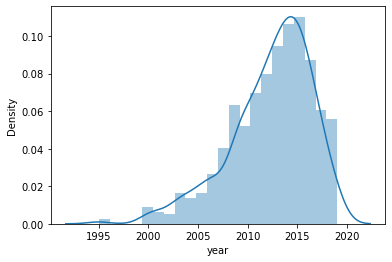

In [362]:
sns.distplot(df['year'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

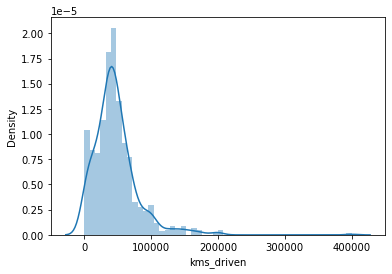

In [363]:
sns.distplot(df['kms_driven'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

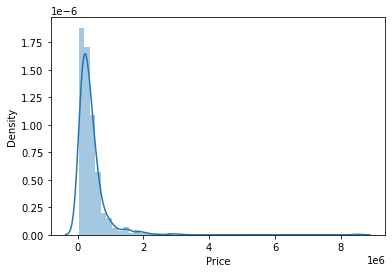

In [364]:
sns.distplot(df['Price'])

In [382]:
df.sort_values(by='Price').head(10)

,index,company,model,series,year,fuel_type,kms_driven,Price
692,851,Maruti,Suzuki 800,Std BS III,2000,Petrol,33400,30000
296,389,Maruti,Suzuki Maruti,800 Std – Befo,1995,Petrol,55000,30000
350,454,Tata,Nano GenX,XMA,2010,Petrol,44005,32000
481,598,Tata,Nano LX,Special Edition,2010,Petrol,48008,32000
439,553,Tata,Indica V2,DLG,2005,Diesel,150000,35000
677,834,Maruti,Suzuki Omni,,2000,Petrol,60000,35999
682,839,Tata,Indica V2,,2005,Diesel,80000,39999
415,529,Maruti,Suzuki Maruti,800 AC,2001,Petrol,75000,40000
314,412,Maruti,Suzuki Zen,LXi BSII,2001,Petrol,40000,40000
162,201,Tata,Nano Cx,BSIV,2013,Petrol,2200,40000


In [383]:
df.sort_values(by='Price').tail(10)

,index,company,model,series,year,fuel_type,kms_driven,Price
201,249,Mini,Cooper S,,2013,Petrol,13000,1891111
548,678,Audi,A4 2.0,TDI 177bhp Premium,2016,Diesel,44000,1900000
188,231,Mercedes,Benz GLA,Class 200 CDI Sport,2015,Diesel,20000,2000000
189,232,Land,Rover Freelander,2 SE,2015,Diesel,30000,2100000
537,667,Jaguar,XF 2.2,Diesel Luxury,2013,Diesel,29000,2190000
538,668,Audi,Q5 2.0,TDI quattro Premium Plus,2014,Diesel,34000,2390000
398,510,Jaguar,XE XE,Portfolio,2016,Petrol,8500,2800000
681,838,Ford,Endeavor 4x4,Thunder Plus,2019,Diesel,9000,2900000
589,719,Audi,A3 Cabriolet,40 TFSI,2015,Petrol,12516,3100000
447,562,Mahindra,XUV500 W6,,2014,Diesel,45000,8500003


<AxesSubplot:xlabel='Price'>

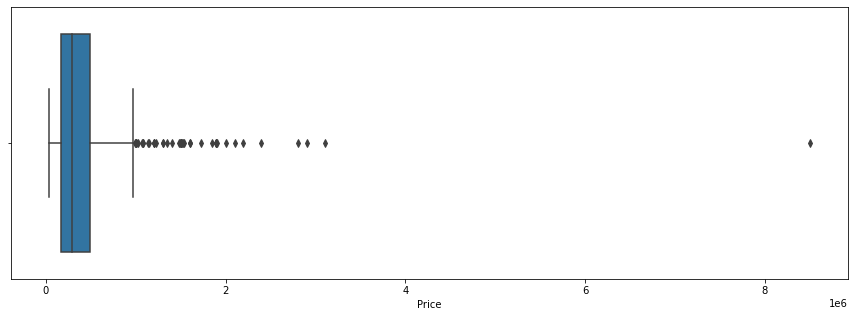

In [393]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Price'])

In [401]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr = q3-q1
lower_value = q1-1.5*iqr
upper_value = q3+1.5*iqr
print(f"""
Q1 : {q1}
Q3 : {q3}
IQR: {iqr}
Lower fence :{lower_value}
Upper fence :{upper_value}

""")


Q1 : 165000.0
Q3 : 489999.0
IQR: 324999.0
Lower fence :-322498.5
Upper fence :977497.5




In [399]:
df[df['Price']<lower_value]

,index,company,model,series,year,fuel_type,kms_driven,Price


In [368]:
df.isnull().sum()

index         0
company       0
model         0
series        0
year          0
fuel_type     0
kms_driven    0
Price         0
dtype: int64

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kms_driven', ylabel='Price'>

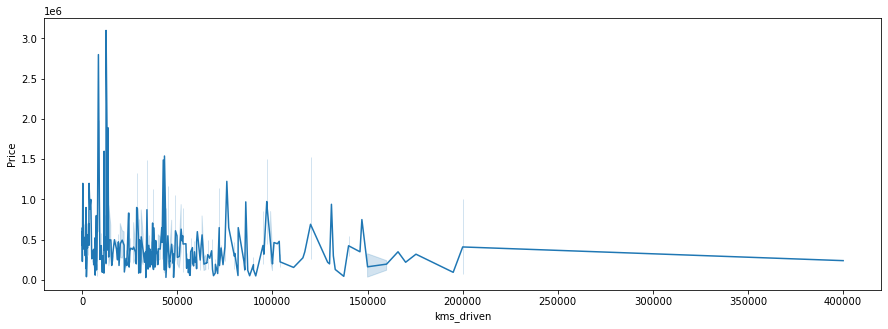

In [403]:
plt.figure(figsize=(15,5))
sns.lineplot(df['kms_driven'],df['Price'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='kms_driven'>

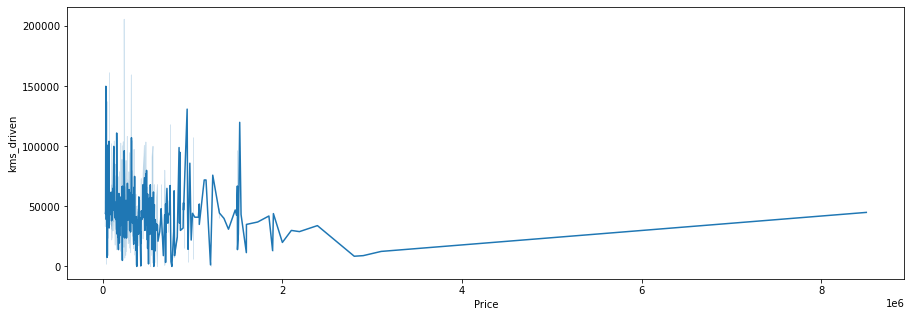

In [404]:
plt.figure(figsize=(15,5))
sns.lineplot(df['Price'],df['kms_driven'])

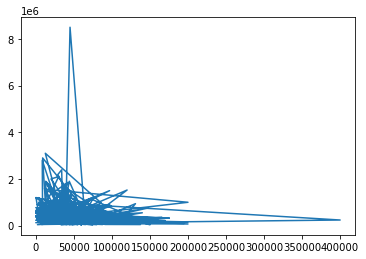

In [405]:
plt.plot(df['kms_driven'],df['Price'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='kms_driven'>

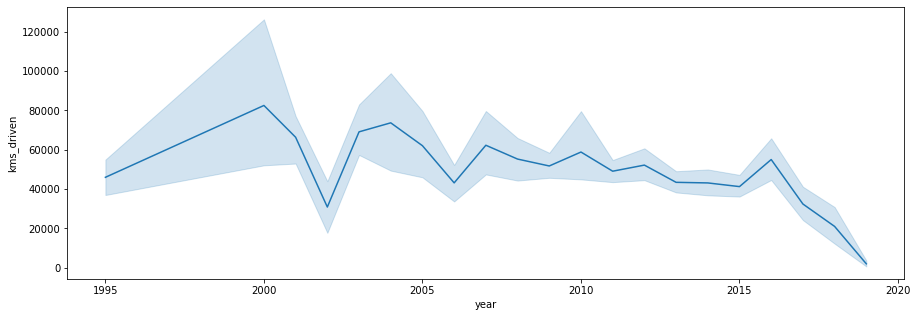

In [407]:
plt.figure(figsize=(15,5))
sns.lineplot(df['year'],df['kms_driven'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='kms_driven'>

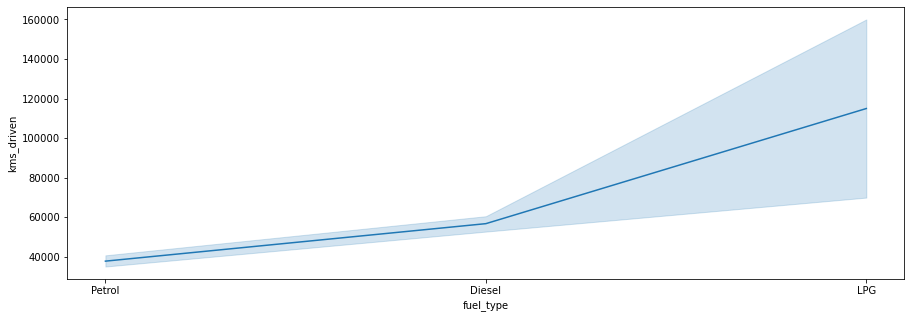

In [408]:
plt.figure(figsize=(15,5))
sns.lineplot(df['fuel_type'],df['kms_driven'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='Price'>

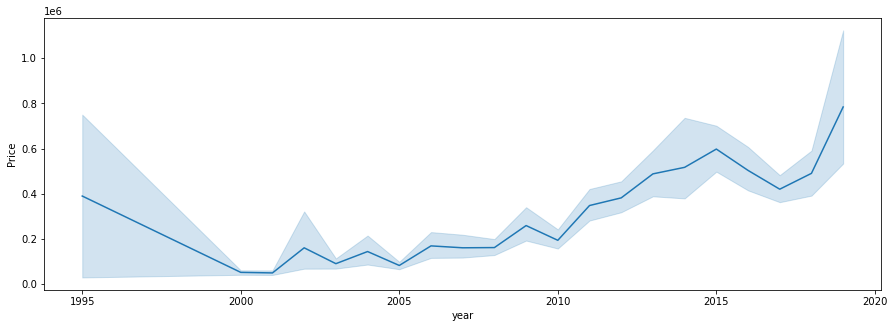

In [409]:
plt.figure(figsize=(15,5))
sns.lineplot(df['year'],df['Price'])

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

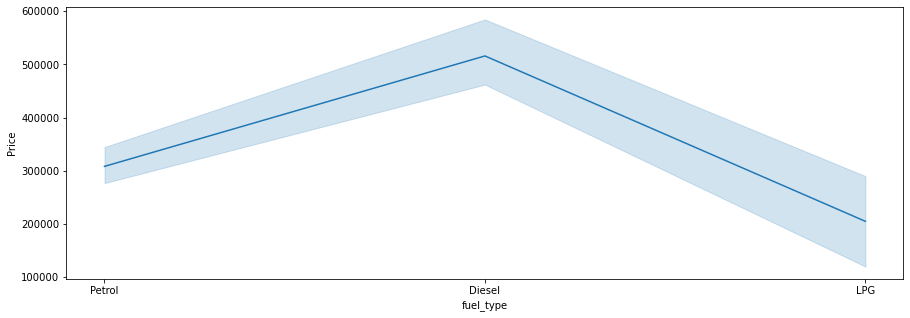

In [410]:
plt.figure(figsize=(15,5))
sns.lineplot(df['fuel_type'],df['Price'])

<AxesSubplot:xlabel='year', ylabel='fuel_type'>

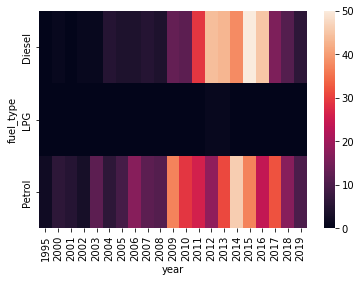

In [422]:
sns.heatmap(pd.crosstab(df['fuel_type'],df['year']))

In [406]:
df.head()

,index,company,model,series,year,fuel_type,kms_driven,Price
0,0,Hyundai,Santro Xing,XO eRLX Euro III,2007,Petrol,45000,80000
1,1,Mahindra,Jeep CL550,MDI,2006,Diesel,40,425000
2,3,Hyundai,Grand i10,Magna 1.2 Kappa VTVT,2014,Petrol,28000,325000
3,4,Ford,EcoSport Titanium,1.5L TDCi,2014,Diesel,36000,575000
4,6,Ford,Figo,,2012,Diesel,41000,175000


In [427]:
df[df['Price']>977497.5].sort_values(by='Price')

,index,company,model,series,year,fuel_type,kms_driven,Price
118,146,Mahindra,Scorpio,,2015,Diesel,22000,984999
12,16,Audi,A8,,2017,Petrol,4000,1000000
560,690,Maruti,Suzuki Ertiga,Vxi,2012,Diesel,200000,1000000
411,525,Hyundai,Creta 1.6,SX Plus Petrol AT,2016,Petrol,8000,1000000
566,696,BMW,X1,,2011,Diesel,34000,1000000
279,361,Mahindra,XUV500,,2015,Diesel,15000,1000000
326,425,Mahindra,TUV300 T8,,2018,Diesel,4500,1000000
541,671,BMW,X1 sDrive20d,,2012,Diesel,41000,1025000
518,648,Mahindra,XUV500 W10,,2016,Diesel,41000,1065000
276,357,Toyota,Fortuner,,2011,Diesel,52000,1074999


In [428]:
df.to_csv('Car_Data_transformed.csv')